# Import dependencies

In [170]:
%matplotlib inline
from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Connect to database

In [171]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [172]:
# Connect to sqlite database using SQLAlchemy ORM
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [173]:
# View all of the classes that automap found
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [174]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [175]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Temperature Analysis II

In [176]:
    """Calculate minimum (TMIN), average (TAVE), and maximum (TMAX) 
        temperatures for a list of dates."""

    """Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    
    
    # TODO: write a function that meets the requirements specified above"""

'Args:\n    start_date (string): A date string in the format %Y-%m-%d\n    end_date (string): A date string in the format %Y-%m-%d\n    \nReturns:\n    TMIN, TAVE, and TMAX\n\n\n# TODO: write a function that meets the requirements specified above'

In [177]:
#Test
start_date = dt.date(2017, 7, 1)
end_date = dt.date(2017, 7, 31)
tmax = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
tmax

[(87.0)]

In [178]:
def calc_temps(start_date,end_date):

    sel = [func.max(Measurement.tobs), func.min(Measurement.tobs),func.avg(Measurement.tobs)]
    
    t = session.query(*sel).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

    temp = [{"Max":t[0], "Min":t[1], "Avg": t[2]} for t in t]
    return(temp)


In [179]:
# Using your function, calculate the min, avg, and max for the matching dates
# from the previous year
temp = calc_temps('2017-08-01','2017-08-07')
temp

[{'Max': 83.0, 'Min': 72.0, 'Avg': 79.25}]

In [180]:
# Plot results as a bar chart per instructions in README
tmax = temp[0]["Max"]
tmin = temp[0]["Min"]
tave = temp[0]["Avg"]

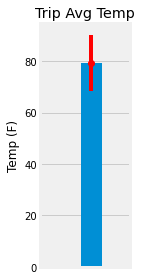

In [202]:
x = [1]
y = [tave]
yerr = [tmax-tmin]
plt.figure(figsize=(2,4))
plt.bar(x,y, align='center')
plt.errorbar(x,y,yerr=yerr, fmt="o", color="r")
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.yticks(np.arange(0, max(y)+10, 20))
plt.xlim(-1,2.5)
plt.xticks([]) 
plt.tight_layout()
plt.show()

## Daily Rainfall Average

In [260]:
# Query rainfall per weather station for previous year, sorted by precipitation
# Include station, name, latitude, longitude, and elevation
start_date ='2017-08-01'
end_date = '2017-08-07'

sel = [Station.station, Station.name, Station.latitude, Station.longitude,\
       Station.elevation, func.avg(Measurement.prcp)]

session.query(*sel).group_by(Measurement.station).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
filter(Measurement.station == Station.station).\
order_by(func.avg(Measurement.prcp).desc()).all()


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.12),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.03666666666666667),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.02),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.005714285714285714),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.0)]

## Daily Temperature Normals

In [288]:
def daily_normals(start_date,end_date):
   
    
    sel = [func.strftime("%m-%d", Measurement.date),\
       func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)]
    
    results = session.query(*sel).group_by(func.strftime("%m-%d", Measurement.date)).\
        filter(func.strftime("%m-%d", Measurement.date) >= start_date).\
        filter(func.strftime("%m-%d", Measurement.date) <= end_date).all()


    return(results)
    """Calculate Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals: tmin, tavg, and tmax
    
    """
    
    # TODO: write a function that meets the requirements specified above

    

In [293]:
# Calculate the daily normals for each day of your trip (inclusive)
daily = daily_normals('08-01','08-07')
daily


[('08-01', 83.0, 67.0, 75.54),
 ('08-02', 84.0, 68.0, 75.60377358490567),
 ('08-03', 85.0, 70.0, 76.61111111111111),
 ('08-04', 84.0, 69.0, 76.71153846153847),
 ('08-05', 82.0, 69.0, 76.14814814814815),
 ('08-06', 83.0, 67.0, 76.25),
 ('08-07', 83.0, 71.0, 77.15686274509804)]

In [298]:
# Load results into a dataframe per README instructions
daily_normal_df = pd.DataFrame(daily, columns=["Date","Max","Min","Avg"])
daily_normal_df.set_index("Date")

,Max,Min,Avg
Date,,,
08-01,83.0,67.0,75.540000
08-02,84.0,68.0,75.603774
08-03,85.0,70.0,76.611111
08-04,84.0,69.0,76.711538
08-05,82.0,69.0,76.148148
08-06,83.0,67.0,76.250000
08-07,83.0,71.0,77.156863


In [316]:
daily_normal_df.index

RangeIndex(start=0, stop=7, step=1)

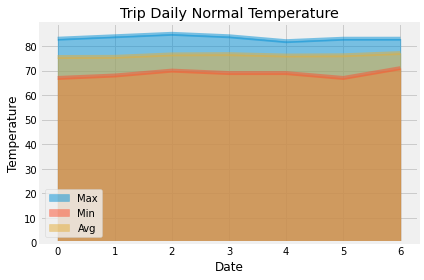

In [318]:
daily_normal_df.plot.area(stacked=False)
x = daily_normal_df["Date"]
plt.title("Trip Daily Normal Temperature")
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.xticks(range(0,len(daily_normal_df.index)),daily_normal_df.index)
plt.tight_layout()
plt.show()

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session